# Author: Shantanu Tyagi
# Date: 21-02-2021
# ID: 201801015

## Question 1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy import stats

# Column Name
name1 = "AirTime"
name2 = "Distance"

# Reading CSV
df = pd.read_csv('2008.csv', usecols=[name1, name2])
df = df.dropna(subset=[name1, name2]) 

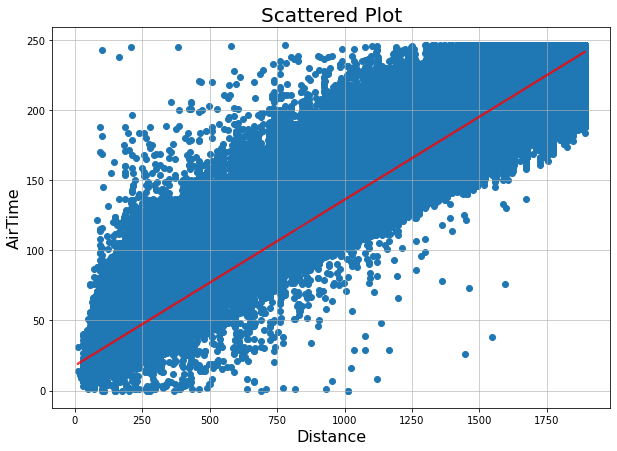

COLUMN: AirTime
Mean: 92.36460772858683
STD: 48.91669905626987

COLUMN: Distance
Mean: 629.9026030508991
STD: 402.54821663413406

Slope: 0.11856135277120197
Intercept: 17.68250299677078


In [2]:
# Dataframes
df1 = df[name1]
df2 = df[name2]

# Removing outliers based on IQR
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3 - q1 #stats.iqr(df1, interpolation = 'midpoint')
low_lim = q1 - 1.5 * iqr
up_lim = q3 + 1.5 * iqr
df = df[df[name1] <= up_lim]
df = df[df[name1] >= low_lim]
#print('COLUMN: ' + name1)
#print('25%ile: ' + str(q1))
#print('75%ile: ' + str(q3))
#print('IQR: ' + str(iqr))
#print('25%ile - 1.5*IQR: ' + str(low_lim))
#print('75%ile + 1.5*IQR: ' + str(up_lim))
#print()

q1 = df2.quantile(0.25)
q3 = df2.quantile(0.75)
iqr = q3 - q1 #stats.iqr(df1, interpolation = 'midpoint')
low_lim = q1 - 1.5 * iqr
up_lim = q3 + 1.5 * iqr
df = df[df[name2] <= up_lim]
df = df[df[name2] >= low_lim]
#print('COLUMN: ' + name2)
#print('25%ile: ' + str(q1))
#print('75%ile: ' + str(q3))
#print('IQR: ' + str(iqr))
#print('25%ile - 1.5*IQR: ' + str(low_lim))
#print('75%ile + 1.5*IQR: ' + str(up_lim))

# New dataframes for individual analysis
df1 = df[name1]
df2 = df[name2]

# Normalise to STD Normal such that MEAN = 0, VAR(SD) = 1
#df1 = ( df1 - df1.mean() ) / df1.std()
#df2 = ( df2 - df2.mean() ) / df2.std()

plt.figure(figsize=(10, 7))
plt.scatter(df2, df1)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2, df1)
x = df2
y = slope*df2 + intercept
plt.plot(x,y, 'r', alpha=0.75, linewidth = 2)
plt.title('Scattered Plot', fontsize=20)
plt.xlabel(name2, fontsize=16)
plt.ylabel(name1, fontsize=16)
plt.grid(alpha=0.75)
plt.show()

print('COLUMN: ' + name1)
print('Mean: '+str(df1.mean()))
print('STD: '+str(df1.std()))
print()
print('COLUMN: ' + name2)
print('Mean: '+str(df2.mean()))
print('STD: '+str(df2.std()))
print()
print("Slope: "+ str(slope))
print("Intercept: "+ str(intercept))

In [3]:
err = pow(df1-y,2)
rmse = math.sqrt((err.to_frame()).sum()/len(err))
print("RMSE: " + str(rmse))

RMSE: 10.724236433910562


## Question 2

In [4]:
import statsmodels.api as sm
mod = sm.OLS(df1, df2)
res = mod.fit()
print(res.conf_int(0.05))

                 0         1
Distance  0.138478  0.138508


In [5]:
df1 = np.array(df1)
df2 = np.array(df2)
sx = 0
sy = 0
mx = df2.mean()
my = df1.mean()
for i in range(df2.size):
    sx = sx + (df2[i] - mx)**2
    sy = sy + (df1[i] - my)**2
sx = math.sqrt(sx/(df2.size-1))
sy = math.sqrt(sy/(df1.size-1))
t = (mx - my)/math.sqrt(sx**2/df2.size + sy**2/df1.size)
df1 = pd.Series(df1)
df2 = pd.Series(df2)
low = slope - std_err * t
high = slope + std_err * t
print(low)
print(high)
print(high - low)

0.08324655145928606
0.1538761540831179
0.07062960262383183


## Question 3

In [6]:
d = df1 - y
q1 = d.quantile(0.25)
q3 = d.quantile(0.75)
s = q3 - q1
u = np.array(d/(3*s))
w = np.zeros(u.size)
for i in range(w.size):
    if u[i] <= int(1):
        w[i] = (1 - u[i]**2)**2
df1 = np.array(df1)
df2 = np.array(df2)

In [7]:
for i in range(df2.size):
    df1[i] = df1[i] * w[i]
    df2[i] = df2[i] * w[i]
df1 = pd.Series(df1)
df2 = pd.Series(df2)

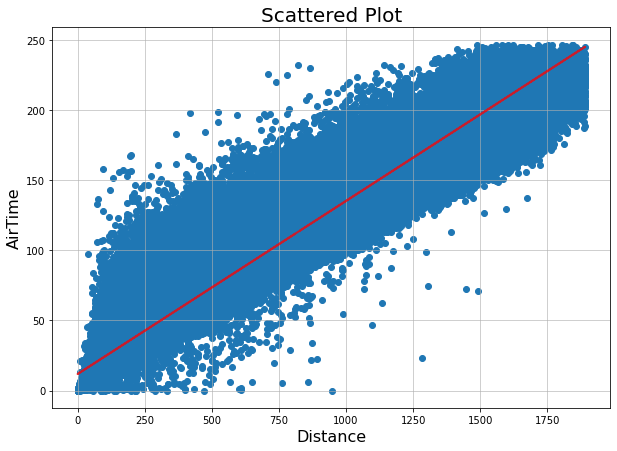

Slope: 0.12349160582957687
Intercept: 11.791129370095206

RMSE: 9.780556163003997


In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(df2, df1)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2, df1)
x = df2
y = slope*df2 + intercept
plt.plot(x,y, 'r', alpha=0.75, linewidth = 2)
plt.title('Scattered Plot', fontsize=20)
plt.xlabel(name2, fontsize=16)
plt.ylabel(name1, fontsize=16)
plt.grid(alpha=0.75)
plt.show()
print("Slope: "+ str(slope))
print("Intercept: "+ str(intercept))
err = pow(df1-y,2)
rmse = math.sqrt((err.to_frame()).sum()/len(err))
print()
print("RMSE: " + str(rmse))